In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Importing Dataset

In [40]:
df = pd.read_csv('Data/house_prices.csv')

In [41]:
df.head(5)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


## Removed the columns with high percentage of null values or with constant value and the index column

In [42]:
df_clean = df.drop(['Society','Car Parking','Status','Super Area','Dimensions','Plot Area','Index','Society','overlooking'], axis=1)
df_clean.head(5)

,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,10 out of 11,Resale,Unfurnished,NaN,1,2,NaN
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,3 out of 22,Resale,Semi-Furnished,East,2,NaN,Freehold
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,10 out of 29,Resale,Unfurnished,East,2,NaN,Freehold
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,1 out of 3,Resale,Unfurnished,NaN,1,1,NaN
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,20 out of 42,Resale,Unfurnished,West,2,NaN,Co-operative Society


## Handling null values in Balcony column

In [44]:
df_clean['Balcony'].isnull().sum()
df_clean['Balcony'] = df_clean['Balcony'].fillna(df_clean['Balcony'].mode()[0])
df_clean['Balcony'].isnull().sum()

48935

## Extracting BHK info from Title column

In [53]:
df_clean['BHK'] = df_clean['Title'].str.extract(r'(\d+)').astype(float).astype('Int64')

In [55]:
df_clean['BHK'].isnull().sum()

854

## Handling null values in BHK column

In [56]:
df_clean['BHK'] = df_clean['BHK'].fillna(df_clean['BHK'].mode()[0])
df_clean['BHK'].isnull().sum()

In [60]:
df_clean['Floor'].describe()

count         180454
unique           947
top       2 out of 4
freq           12433
Name: Floor, dtype: object

In [61]:
df_clean['Floor'] = df_clean['Floor'].str.extract(r'(\d+)').astype(float).astype('Int64')

In [71]:
df_clean['Floor'][95148]

<NA>

## Converted Floor from object to float

In [ ]:
def extract_floor(value):
    if pd.isna(value):
        return None
    value = value.strip()
    match = re.match(r'^(\d+)', value)
    if match:
        return int(match.group(1))

    if value.lower().startswith("ground"):
        return 0
    elif value.lower().startswith("upper"):
        return -1
    elif value.lower().startswith("lower"):
        return -2
    return None

df_clean['Floor'] = df['Floor'].apply(extract_floor)
df_clean['Floor'].describe()

In [103]:
df_clean['Floor'].isnull().sum()

6949

In [ ]:
df_clean['Floor'] = df_clean['Floor'].fillna(df_clean['Floor'].mode()[0])

In [105]:
df_clean['Floor'].isnull().sum()

0

In [110]:
df_clean['Floor'] = df_clean['Floor'].astype(int).astype("Int64")

In [112]:
print(df_clean['Floor'].dtype)
print(df_clean['Floor'].head(10))
print(type(df_clean['Floor'].iloc[0]))


Int64
0    10
1     3
2    10
3     1
4    20
5     2
6     4
7     0
8     0
9     3
Name: Floor, dtype: Int64
<class 'numpy.int64'>


In [111]:
df_clean['Floor'].describe()

count    177837.0
mean     4.399338
std      4.610984
min          -2.0
25%           2.0
50%           3.0
75%           5.0
max          75.0
Name: Floor, dtype: Float64

## Correcting the max floor value as it seems to be a typo

In [ ]:
df_clean.loc[df_clean['Floor'] == 200,'Floor'] = 20
df_clean['Floor'].describe()

## Converting Target Column (Amount (to rupees)) and also correcting the skewness of the column

In [82]:
df_clean['Amount(in rupees)'].isnull().sum()

0

In [83]:
def conv_to_inr(s):
    s = s.strip()
    if s.endswith(' Lac'):
        s = s.replace(' Lac', '')
        return int(float(s) * 1e5)
    elif s.endswith(" Cr"):
        s = s.replace(" Cr", "")
        return int(float(s) * 1e7)
    else:
        try:
            return int(float(s))
        except ValueError:
            return None

df_clean['Amount(in rupees)'] = df_clean['Amount(in rupees)'].apply(conv_to_inr)

In [84]:
df_clean['Amount(in rupees)'].describe()

count    1.778470e+05
mean     1.198134e+07
std      3.943827e+07
min      1.000000e+05
25%      4.840000e+06
50%      7.800000e+06
75%      1.450000e+07
max      1.400300e+10
Name: Amount(in rupees), dtype: float64

In [85]:
print(df_clean['Amount(in rupees)'].skew())

270.25594003861767


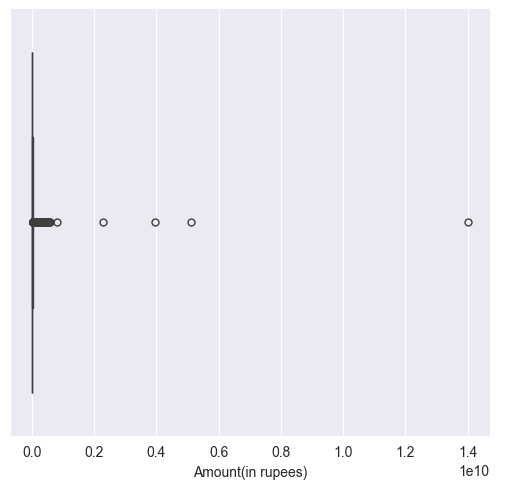

In [87]:
sns.catplot(data = df_clean,x='Amount(in rupees)',kind='box')
plt.show()

In [88]:
df_clean = df_clean[df_clean['Amount(in rupees)'] < (50 * 1e7)]

In [89]:
print(df_clean['Amount(in rupees)'].skew())

6.348444996118282


In [91]:
df_clean.loc[:,'Amount(in rupees)'] = np.log1p(df_clean['Amount(in rupees)'])

In [93]:
print(df_clean['Amount(in rupees)'].skew())

0.27497285743393796


## Dropping the Title and Description Column

In [94]:
df_clean = df_clean.drop(['Title','Description'],axis=1)

In [95]:
df_clean.head()

,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership,BHK
0,15.250595,6000.0,thane,500 sqft,10.0,Resale,Unfurnished,NaN,1,2,NaN,1
1,16.097893,13799.0,thane,473 sqft,3.0,Resale,Semi-Furnished,East,2,2,Freehold,2
2,16.454568,17500.0,thane,779 sqft,10.0,Resale,Unfurnished,East,2,2,Freehold,2
3,14.731802,NaN,thane,530 sqft,1.0,Resale,Unfurnished,NaN,1,1,NaN,1
4,16.588099,18824.0,thane,635 sqft,20.0,Resale,Unfurnished,West,2,2,Co-operative Society,2


In [97]:
print(df_clean['Price (in rupees)'].skew())

241.61422725797289


## Creating an Area column with all values in sqft and also handling Null Values in it

In [113]:
df_clean['Carpet Area'].isnull().sum()

76322

In [114]:
conversion_factors = {
    "sqft": 1,
    "sqm": 10.7639,
    "sqyrd": 9
}

def to_sqft(value):
    if pd.isna(value):
        return None
    value = value.strip().lower()
    for unit, factor in conversion_factors.items():
        if unit in value:
            num = float(value.replace(unit, "").strip())
            return round(num * factor, 2)
    return None

df_clean['Area'] = df_clean['Carpet Area'].apply(to_sqft)

In [116]:
df_clean['Area'].describe()

count    101507.000000
mean       1290.306774
std        3140.037738
min           1.000000
25%         850.000000
50%        1100.000000
75%        1550.000000
max      709222.000000
Name: Area, dtype: float64

In [117]:
df_clean['Area'].isnull().sum()

76330

In [119]:
df_clean['Area'] = df_clean.groupby('BHK')['Area'].transform(lambda x: x.fillna(x.median())) # This ran but some of the null values are still left

D:\Environments\tf_gpu\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\Environments\tf_gpu\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\Environments\tf_gpu\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\Environments\tf_gpu\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\Environments\tf_gpu\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [120]:
# Dealt with the remaining null values
overall_median_area = df_clean['Area'].median()
df_clean['Area'] = df_clean['Area'].fillna(overall_median_area)

In [121]:
df_clean['Area'].isnull().sum()

0

In [122]:
df_clean.head()

,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership,BHK,Area
0,15.250595,6000.0,thane,500 sqft,10,Resale,Unfurnished,NaN,1,2,NaN,1,500.0
1,16.097893,13799.0,thane,473 sqft,3,Resale,Semi-Furnished,East,2,2,Freehold,2,473.0
2,16.454568,17500.0,thane,779 sqft,10,Resale,Unfurnished,East,2,2,Freehold,2,779.0
3,14.731802,NaN,thane,530 sqft,1,Resale,Unfurnished,NaN,1,1,NaN,1,530.0
4,16.588099,18824.0,thane,635 sqft,20,Resale,Unfurnished,West,2,2,Co-operative Society,2,635.0


In [123]:
df_clean = df_clean.drop('Carpet Area', axis=1) # Dropping carpet area as we extracted the required info in the Area column

## Handling Null values in Bathroom column and other problems

In [124]:
df_clean['Bathroom'].isnull().sum()

760

In [125]:
df_clean['Bathroom'].describe()

count     177077
unique        11
top            2
freq       88996
Name: Bathroom, dtype: object

In [ ]:
def clean_bathroom(val):
    if pd.isna(val):
        return None
    val = str(val).strip()
    if val.startswith(">"):
        return 11
    try:
        return int(val)
    except ValueError:
        return None

df_clean['Bathroom'] = df_clean['Bathroom'].apply(clean_bathroom)

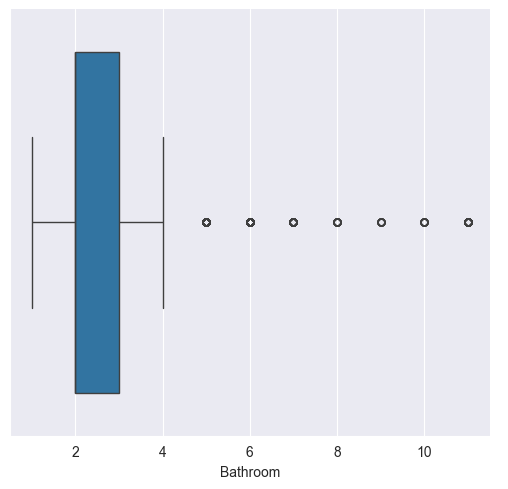

In [153]:
sns.catplot(data = df_clean,x='Bathroom',kind='box')
plt.show()

In [127]:
df_clean['Bathroom'].describe()

count    177077.000000
mean          2.449381
std           0.858831
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          11.000000
Name: Bathroom, dtype: float64

In [129]:
df_clean['Bathroom'] = df_clean['Bathroom'].fillna(df_clean['Bathroom'].mode()[0])
df_clean['Bathroom'].isnull().sum()

0

In [130]:
df_clean.head(5)

,Amount(in rupees),Price (in rupees),location,Floor,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership,BHK,Area
0,15.250595,6000.0,thane,10,Resale,Unfurnished,NaN,1.0,2,NaN,1,500.0
1,16.097893,13799.0,thane,3,Resale,Semi-Furnished,East,2.0,2,Freehold,2,473.0
2,16.454568,17500.0,thane,10,Resale,Unfurnished,East,2.0,2,Freehold,2,779.0
3,14.731802,NaN,thane,1,Resale,Unfurnished,NaN,1.0,1,NaN,1,530.0
4,16.588099,18824.0,thane,20,Resale,Unfurnished,West,2.0,2,Co-operative Society,2,635.0


In [131]:
df_clean = df_clean.drop('Price (in rupees)', axis=1)

In [132]:
df_clean.head(5)

,Amount(in rupees),location,Floor,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership,BHK,Area
0,15.250595,thane,10,Resale,Unfurnished,NaN,1.0,2,NaN,1,500.0
1,16.097893,thane,3,Resale,Semi-Furnished,East,2.0,2,Freehold,2,473.0
2,16.454568,thane,10,Resale,Unfurnished,East,2.0,2,Freehold,2,779.0
3,14.731802,thane,1,Resale,Unfurnished,NaN,1.0,1,NaN,1,530.0
4,16.588099,thane,20,Resale,Unfurnished,West,2.0,2,Co-operative Society,2,635.0


## Handling Null Values in Transaction column

In [134]:
df_clean['Transaction'].sample(5)

10478           Resale
120390    New Property
111653          Resale
71729     New Property
19398           Resale
Name: Transaction, dtype: object

In [135]:
df_clean['Transaction'] = df_clean['Transaction'].fillna(df_clean['Transaction'].mode()[0])
df_clean['Transaction'].isnull().sum()

0

## Handling Null Values in Facing column

In [136]:
df_clean['facing'].isnull().sum()

65734

In [137]:
df_clean['facing'] = df_clean['facing'].fillna(df_clean['facing'].mode()[0])
df_clean['facing'].isnull().sum()

0

## Handling Null Values in Furnishing column

In [138]:
df_clean['Furnishing'].isnull().sum()

2067

In [139]:
df_clean['Furnishing'] = df_clean['Furnishing'].fillna(df_clean['Furnishing'].mode()[0])
df_clean['Furnishing'].isnull().sum()

0

## Handling odd values in Balcony Column

In [146]:
df_clean['Balcony'].isnull().sum()

0

In [144]:
def clean_balcony(val):
    if pd.isna(val):
        return None
    val = str(val).strip()
    if val.startswith(">"):
        return 11
    try:
        return int(val)
    except ValueError:
        return None

df_clean['Balcony'] = df_clean['Balcony'].apply(clean_balcony)

In [145]:
df_clean['Balcony'].describe()

count    177837.000000
mean          2.009616
std           0.819872
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          11.000000
Name: Balcony, dtype: float64

## Handling Null Values in Ownership column

In [147]:
df_clean['Ownership'].isnull().sum()

61923

In [148]:
df_clean['Ownership'] = df_clean['Ownership'].fillna(df_clean['Ownership'].mode()[0])
df_clean['Ownership'].isnull().sum()

0

In [149]:
df_clean['location'].describe()

count        177837
unique           81
top       new-delhi
freq          24945
Name: location, dtype: object

## Handling some outliers in Bathroom and Balcony columns which increased the skewness

In [ ]:
bathroom_percentile = df_clean['Bathroom'].quantile(0.999)
df_clean['Bathroom'] = np.where(df_clean['Bathroom'] > bathroom_percentile, bathroom_percentile, df_clean['Bathroom'])

# You can apply the same logic to the 'balcony' column
balcony_percentile = df_clean['Balcony'].quantile(0.999)
df_clean['Balcony'] = np.where(df_clean['Balcony'] > balcony_percentile, balcony_percentile, df_clean['Balcony'])

In [162]:
df_clean['Bathroom'].max()

6.0

In [157]:
print(df['Bathroom'].describe())

count     186703
unique        11
top            2
freq       93007
Name: Bathroom, dtype: object


## Encoding Categorical Columns (using One Hot Encoding)

In [163]:
categorical_cols = ['location', 'Transaction', 'Furnishing', 'facing', 'Ownership']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, dtype=int)

In [151]:
df_encoded.head(5)

,Amount(in rupees),Floor,Bathroom,Balcony,BHK,Area,location_agra,location_ahmadnagar,location_ahmedabad,location_allahabad,...,facing_North - East,facing_North - West,facing_South,facing_South - East,facing_South -West,facing_West,Ownership_Co-operative Society,Ownership_Freehold,Ownership_Leasehold,Ownership_Power Of Attorney
0,15.250595,10,1.0,2,1,500.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,16.097893,3,2.0,2,2,473.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,16.454568,10,2.0,2,2,779.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,14.731802,1,1.0,1,1,530.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,16.588099,20,2.0,2,2,635.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [164]:
df_encoded.to_csv('CleanedData_OHE.csv', index=False)

In [165]:
df_clean.to_csv('CleanedData.csv', index=False)